# Notebook
https://www.kaggle.com/williamroe/bi-lstm-with-crf-for-ner

In [1]:
%pip install tensorflow==2.4.0  # 2.5.0  # 2.2.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
# %pip install tensorflow_addons==0.13.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
# %pip install keras-crf==0.2.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
# %pip install tensorflow-cpu==2.4.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
# %pip install git+https://www.github.com/keras-team/keras-contrib.git
# # %pip install keras-contrib==0.1

  Cloning https://www.github.com/keras-team/keras-contrib.git to /private/var/folders/jc/x4s6x68n7rl6xv2nd9v3m96h0000gn/T/pip-req-build-zcylokto
  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101064 sha256=318c089c66b6f495e2b59edf15fdb616bcb28e967be892985028638c4418a5c4
  Stored in directory: /private/var/folders/jc/x4s6x68n7rl6xv2nd9v3m96h0000gn/T/pip-ephem-wheel-cache-prtzwcgk/wheels/67/d2/f4/96ae3c3c62d1e05abfc8860ad0c1207794726d44ebbbb547f3
Successfully built keras-contrib
Note: you may need to restart the kernel to use updated packages.


In [6]:
# https://github.com/xuxingya/tf2crf
# %pip install tf2crf==0.1.32

In [7]:
# %env SM_FRAMEWORK=tf.keras

In [8]:
# %pip uninstall --yes tf-nightly

In [ ]:
%pip install s3fs

In [5]:
filepath = 's3://sagemaker-studio-528576943967-ssf9zkrg3os/parc30-conll/prepared/'

In [ ]:
import numpy as np
import pandas as pd 
import s3fs


train_filename = 'parc30_preprocessed_train_noBIO.tsv'
df_train = pd.read_csv(filepath + filename, sep="\t")

print(len(df_train.index))
df.head(20)
    

In [6]:
# import numpy as np
# import pandas as pd 
# import s3fs
# from os import listdir
# from os.path import isfile, join

# files_list = listdir(filepath)
# # files_list = ['wsj_0003.xml.conll.features.foreval']

# df_train = pd.DataFrame()
# for filename in files_list[0:100]:
#     df = pd.read_csv(filepath + filename, sep="\t", header=None, engine='python', names=['col' + str(x) for x in range(1, 30) ])
#     # Delete all columns fully filled with NaN
#     df = df.dropna(axis=1, how='all')
#     df_train = df_train.append(df)
    
# print(len(df_train.index))
# # print(sorted(files_list))

11123


In [ ]:
class SentenceGetter(object):
    
    def __init__(self, dataset):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [(w, t) for w,t in zip(s["word"].values.tolist(),
                                                        s["tag"].values.tolist())]
        self.grouped = self.dataset.groupby("sentence_idx").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [18]:
getter = SentenceGetter(dataset)

In [19]:
sentences = getter.sentences

In [20]:
print(sentences[10])

[('``', 'CONTENT'), ('September', 'CONTENT'), ('be', 'CONTENT'), ('one', 'CONTENT'), ('of', 'CONTENT'), ('the', 'CONTENT'), ('biggest', 'CONTENT'), ('order', 'CONTENT'), ('month', 'CONTENT'), ('in', 'CONTENT'), ('we', 'CONTENT'), ('history', 'CONTENT'), (',', 'CONTENT'), ("''", 'CONTENT'), ('say', 'CUE'), ('James', 'SOURCE'), ('R.', 'SOURCE'), ('Roberts', 'SOURCE'), (',', 'SOURCE'), ('vice', 'SOURCE'), ('president', 'SOURCE'), (',', 'SOURCE'), ('world-wide', 'SOURCE'), ('sale', 'SOURCE'), ('and', 'SOURCE'), ('marketing', 'SOURCE'), (',', 'SOURCE'), ('for', 'SOURCE'), ('Giddings', 'SOURCE'), ('&amp;', 'SOURCE'), ('Lewis', 'SOURCE'), ('Inc.', 'SOURCE'), (',', 'SOURCE'), ('Fond', 'SOURCE'), ('du', 'SOURCE'), ('Lac', 'SOURCE'), (',', 'SOURCE'), ('Wis', 'SOURCE'), ('.', 'O'), ('in', 'O'), ('1979', 'O'), (',', 'O'), ('two', 'O'), ('Voyager', 'O'), ('spacecraft', 'O'), ('send', 'O'), ('back', 'O'), ('stunning', 'O'), ('photo', 'O'), ('of', 'O'), ('jovian', 'O'), ('moon', 'O'), ('Io', 'O'), ('

In [21]:
maxlen = max([len(s) for s in sentences])
print ('Maximum sequence length:', maxlen)

Maximum sequence length: 560


In [22]:
# Check how long sentences are so that we can pad them
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

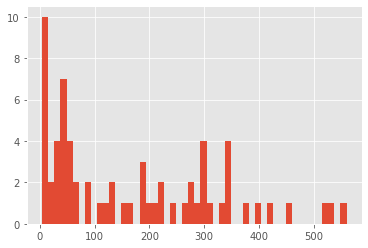

In [23]:
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [24]:
words = list(set(dataset["word"].values))
words.append("ENDPAD")

In [25]:
n_words = len(words)
n_words

2364

In [26]:
from math import nan

tags = []
for tag in set(dataset["tag"].values):
    if tag is nan or isinstance(tag, float):
        tags.append('unk')
    else:
        tags.append(tag)
print(tags)

['O', 'CONTENT', 'SOURCE', 'CUE']


In [27]:
n_tags = len(tags); n_tags

4

In [28]:
from future.utils import iteritems
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}
idx2tag = {v: k for k, v in iteritems(tag2idx)}

In [29]:
word2idx['the']

2069

In [30]:
# word2idx

In [31]:
tag2idx["O"]

0

In [32]:
print(tag2idx)

{'O': 0, 'CONTENT': 1, 'SOURCE': 2, 'CUE': 3}


In [33]:
idx2tag[3]

'CUE'

In [34]:
idx2tag

{0: 'O', 1: 'CONTENT', 2: 'SOURCE', 3: 'CUE'}

In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = [[word2idx[w[0]] for w in s] for s in sentences]

In [36]:
print(X[10])

[2340, 1215, 1947, 2360, 1040, 2069, 313, 293, 1167, 1253, 1571, 1872, 165, 297, 173, 2147, 722, 1765, 165, 1476, 509, 165, 1573, 1694, 2018, 204, 165, 2202, 1422, 2322, 1590, 1581, 165, 1950, 1132, 2005, 165, 715, 1161, 1253, 1307, 165, 2072, 2167, 2270, 1715, 2162, 812, 1912, 1040, 1552, 1235, 2272, 2018, 230, 467, 2304, 2016, 794, 1947, 775, 2069, 1892, 1708, 2342, 1253, 2069, 1297, 1056, 1161, 887, 1601, 173, 687, 430, 2295, 674, 1591, 366, 278, 423, 165, 2018, 1089, 214, 2206, 430, 865, 45, 794, 2294, 2069, 484, 1544, 794, 763, 2069, 222, 1040, 1591, 89, 1161, 604, 1898, 837, 165, 2075, 587, 380, 165, 2145, 2322, 1177, 165, 1128, 1894, 1177, 2225, 2157, 165, 1906, 2322, 1177, 1880, 165, 1053, 2076, 2018, 1843, 2322, 1177, 467, 1357, 81, 2127, 1630, 653, 1411, 768, 2016, 314, 1040, 2016, 2358, 794, 97, 1706, 165, 445, 188, 2018, 647, 1945, 2166, 1027, 1161, 1571, 507, 823, 220, 2018, 1354, 887, 2202, 823, 395, 1103, 165, 654, 1571, 653, 2206, 702, 1357, 81, 1947, 591, 1161, 1253, 2

In [37]:
np.array(X).shape

<ipython-input-37-9087bc21783f>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(X).shape


(66,)

In [38]:
X = pad_sequences(maxlen=maxlen, sequences=X, padding="post",value=n_words - 1)
print(X[10])

[2340 1215 1947 2360 1040 2069  313  293 1167 1253 1571 1872  165  297
  173 2147  722 1765  165 1476  509  165 1573 1694 2018  204  165 2202
 1422 2322 1590 1581  165 1950 1132 2005  165  715 1161 1253 1307  165
 2072 2167 2270 1715 2162  812 1912 1040 1552 1235 2272 2018  230  467
 2304 2016  794 1947  775 2069 1892 1708 2342 1253 2069 1297 1056 1161
  887 1601  173  687  430 2295  674 1591  366  278  423  165 2018 1089
  214 2206  430  865   45  794 2294 2069  484 1544  794  763 2069  222
 1040 1591   89 1161  604 1898  837  165 2075  587  380  165 2145 2322
 1177  165 1128 1894 1177 2225 2157  165 1906 2322 1177 1880  165 1053
 2076 2018 1843 2322 1177  467 1357   81 2127 1630  653 1411  768 2016
  314 1040 2016 2358  794   97 1706  165  445  188 2018  647 1945 2166
 1027 1161 1571  507  823  220 2018 1354  887 2202  823  395 1103  165
  654 1571  653 2206  702 1357   81 1947  591 1161 1253 2121 2165 1636
  729 1585   54  165 2031 1576 1462  596 1699  165  346 1705 1741 1161
 2069 

In [39]:
y_idx = [[tag2idx[w[1]] for w in s] for s in sentences]
print('sentences[25]')
print(sentences[25])
print('y_idx[25]')
print(y_idx[25])
print('sentences[10]')
print(sentences[10])
print('y_idx[10]')
print(y_idx[10])
print(len(y_idx[10]))

sentences[25]
[('shipment', 'O'), ('have', 'O'), ('run', 'O'), ('well', 'O'), ('ahead', 'O'), ('of', 'O'), ('1988', 'O'), ('all', 'O'), ('year', 'O'), (',', 'O'), ('as', 'O'), ('machine', 'O'), ('tool', 'O'), ('builder', 'O'), ('produce', 'O'), ('against', 'O'), ('relatively', 'O'), ('good', 'O'), ('backlog', 'O'), ('.', 'O'), ('they', 'SOURCE'), ('say', 'CUE'), ('they', 'CONTENT'), ('drop', 'CONTENT'), ('plan', 'CONTENT'), ('to', 'CONTENT'), ('infiltrate', 'CONTENT'), ('the', 'CONTENT'), ('Kennedy', 'CONTENT'), ('Space', 'CONTENT'), ('Center', 'CONTENT'), ('after', 'CONTENT'), ('NASA', 'CONTENT'), ('beef', 'CONTENT'), ('up', 'CONTENT'), ('its', 'CONTENT'), ('security', 'CONTENT'), ('.', 'O'), ('Mr.', 'O'), ('Timbers', 'O'), ('counter', 'O'), ('that', 'O'), ('``', 'O'), ('the', 'O'), ('mere', 'O'), ('fact', 'O'), ('they', 'O'), ('put', 'O'), ('in', 'O'), ('circuit', 'O'), ('breaker', 'O'), ('be', 'O'), ('a', 'O'), ('admission', 'O'), ('of', 'O'), ('they', 'O'), ('problem', 'O'), ('.', 

In [40]:
y = pad_sequences(maxlen=maxlen, sequences=y_idx, padding="post", value=tag2idx["O"])
print(y[10])
print(len(y[10]))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 3 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 2 2 2 2 2 2 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 2 3 3 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 3 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 2 2 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2
 2 2 2 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [41]:
from tensorflow.keras.utils import to_categorical
y = [to_categorical(i, num_classes=n_tags) for i in y]
print(y[10][0])

[0. 1. 0. 0.]


In [42]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train, y_train = X, y
X_test, y_test = X, y

In [43]:
print(X_train[10][0])
print(X_test[10][0])
print(y_train[10][0])
print(y_test[10][0])

2340
2340
[0. 1. 0. 0.]
[0. 1. 0. 0.]


In [44]:
from tensorflow.keras.models import Model, Sequential  # , Input
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
import tensorflow.keras as k
import tensorflow as tf

In [45]:
print(k.__version__)

2.4.0


In [46]:
# import tensorflow.keras.utils as generic_utils
# from keras_contrib.layers.crf import CRF
# AttributeError: module 'tensorflow.compat.v2' has no attribute '__internal__'

In [47]:
word_embedding_size = 300

https://github.com/xuxingya/tf2crf

More inspiration:
https://github.com/Akshayc1/named-entity-recognition/blob/master/NER%20using%20Bidirectional%20LSTM%20-%20CRF%20.ipynb
https://www.kaggle.com/nikkisharma536/ner-with-bilstm-and-crf

In [48]:
# Kaggle example code 

inputs = Input(shape=(maxlen,))
# https://stackoverflow.com/questions/55770009/how-to-use-a-pre-trained-embedding-matrix-in-tensorflow-2-0-rnn-as-initial-weigh
outputs = Embedding(input_dim=n_words, output_dim=word_embedding_size, input_length=maxlen)(inputs)
outputs = Bidirectional(LSTM(units=word_embedding_size, 
                             return_sequences=True, 
                             dropout=0.5, 
                             recurrent_dropout=0.5, 
                             kernel_initializer=k.initializers.he_normal()))(outputs)
outputs = LSTM(units=word_embedding_size * 2, 
               return_sequences=True, 
               dropout=0.5, 
               recurrent_dropout=0.5, 
               kernel_initializer=k.initializers.he_normal())(outputs)
# https://github.com/xuxingya/tf2crf: Add internal kernel like CRF in keras_contrib, so now there is no need to stack a Dense layer before the CRF layer.
outputs = Dense(n_tags, activation="relu")(outputs)  # previously softmax output layer
# outputs = TimeDistributed(Dense(n_tags, activation="relu"))(outputs)  # previously softmax output layer
# outputs = TimeDistributed(Dense(n_tags, activation=tensorflow.keras.activations.softmax))(outputs)  # previously softmax output layer

# crf = CRF(n_tags)  # CRF layer
# out = crf(outputs)  # output
# model = Model(input, out)

adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)


In [49]:
# Kaggle version (removed CRF code)

model = Model(inputs, outputs)

# https://stackoverflow.com/questions/61742556/valueerror-shapes-none-1-and-none-2-are-incompatible
# model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])
# model.compile(optimizer=adam, loss=crf.loss_function, metrics=[crf.accuracy, 'accuracy'])# Saving the best only

In [50]:
# # Saving the best only
# from tensorflow.keras.callbacks import ModelCheckpoint

# filepath="ner-bi-lstm-td-model-{val_accuracy:.2f}.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

In [51]:
# # tfcrf version
# model.fit(x=X_train, y=np.array(y_train), epochs=1, batch_size=2)
# model.save('tests/1')

In [52]:
# # Generate generalization metrics
# i = len(X_test) - 1 
# score = model.evaluate(np.array([X_test[:i]]), y_test, verbose=0)
# print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [53]:
model.fit(X_train, np.array(y_train), batch_size=256, epochs=20, validation_split=0.1, verbose=1)  # , callbacks=callbacks_list)

Epoch 1/20
1/1 [==============================] - 51s 51s/step - loss: nan - accuracy: 0.5068 - val_loss: nan - val_accuracy: 0.9847
Epoch 2/20
1/1 [==============================] - 25s 25s/step - loss: nan - accuracy: 0.8493 - val_loss: nan - val_accuracy: 0.9847
Epoch 3/20
1/1 [==============================] - 22s 22s/step - loss: nan - accuracy: 0.8493 - val_loss: nan - val_accuracy: 0.9847
Epoch 4/20
1/1 [==============================] - 21s 21s/step - loss: nan - accuracy: 0.8493 - val_loss: nan - val_accuracy: 0.9847
Epoch 5/20
1/1 [==============================] - 21s 21s/step - loss: nan - accuracy: 0.8493 - val_loss: nan - val_accuracy: 0.9847
Epoch 6/20
1/1 [==============================] - 21s 21s/step - loss: nan - accuracy: 0.8493 - val_loss: nan - val_accuracy: 0.9847
Epoch 7/20
1/1 [==============================] - 22s 22s/step - loss: nan - accuracy: 0.8493 - val_loss: nan - val_accuracy: 0.9847
Epoch 8/20
1/1 [==============================] - 22s 22s/step - loss

In [54]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 560)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 560, 300)          709200    
_________________________________________________________________
bidirectional (Bidirectional (None, 560, 600)          1442400   
_________________________________________________________________
lstm_1 (LSTM)                (None, 560, 600)          2882400   
_________________________________________________________________
dense (Dense)                (None, 560, 4)            2404      
Total params: 5,036,404
Trainable params: 5,036,404
Non-trainable params: 0
_________________________________________________________________


In [55]:
TP = {}
TN = {}
FP = {}
FN = {}
for tag in tag2idx.keys():
    TP[tag] = 0
    TN[tag] = 0    
    FP[tag] = 0    
    FN[tag] = 0    

def accumulate_score_by_tag(gt, pred):
    """
    For each tag keep stats
    """
    if gt == pred:
        TP[gt] += 1
    elif gt != 'O' and pred == 'O':
        FN[gt] +=1
    elif gt == 'O' and pred != 'O':
        FP[gt] += 1
    else:
        TN[gt] += 1

In [56]:
print(X_test)

[[1857  541 1947 ...   52 1115 1161]
 [1215  293 2202 ... 2363 2363 2363]
 [ 292  161 1219 ... 2363 2363 2363]
 ...
 [2069  170 1794 ... 2363 2363 2363]
 [ 898 1506 1947 ... 2363 2363 2363]
 [1248  102 1947 ... 2363 2363 2363]]


In [57]:
### Predict single sentence

In [70]:
# i = 1  # len(X_test) - 1  # Last one 
# p = model.predict(np.array([X_test[i]]))
# p = np.argmax(p, axis=-1)
# print(p.shape)
# gt = np.argmax(y_test[i], axis=-1)
# print(gt)
# print("{:14}: ({:5}): {}".format("Word", "True", "Pred"))
# print(p)
# for idx, (w,pred) in enumerate(zip(X_test[i],p[0])):
#     if words[w] == 'ENDPAD':
#         break
#     print("{:14}: ({:5}): {}".format(words[w],idx2tag[gt[idx]],tags[pred]))

In [71]:
p = model.predict(np.array(X_test))

In [72]:
p.shape

(66, 560, 4)

In [73]:
# p

In [74]:
from sklearn.metrics import classification_report

In [75]:
axis = 2

In [76]:
np.argmax(p, axis=axis)[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [77]:
print(classification_report(np.argmax(y_test, axis=axis).ravel(), np.argmax(p, axis=axis).ravel(),labels=list(idx2tag.keys()), target_names=list(idx2tag.values())))

              precision    recall  f1-score   support

           O       0.86      1.00      0.93     31920
     CONTENT       0.00      0.00      0.00      4157
      SOURCE       0.00      0.00      0.00       677
         CUE       0.00      0.00      0.00       206

    accuracy                           0.86     36960
   macro avg       0.22      0.25      0.23     36960
weighted avg       0.75      0.86      0.80     36960



In [78]:
for i, sentence in enumerate(X_test):
    y_hat = np.argmax(p[i], axis=-1)
    gt = np.argmax(y_test[i], axis=-1)
    for idx, (w,pred) in enumerate(zip(sentence,y_hat)):
        accumulate_score_by_tag(idx2tag[gt[idx]],tags[pred])

In [79]:
for tag in tag2idx.keys():
    print(f'tag:{tag}')    
    print('\t TN:{:10}\tFP:{:10}'.format(TN[tag],FP[tag]))
    print('\t FN:{:10}\tTP:{:10}'.format(FN[tag],TP[tag]))  

tag:O
	 TN:         0	FP:         0
	 FN:         0	TP:     63840
tag:CONTENT
	 TN:         0	FP:         0
	 FN:      8314	TP:         0
tag:SOURCE
	 TN:         0	FP:         0
	 FN:      1354	TP:         0
tag:CUE
	 TN:         0	FP:         0
	 FN:       412	TP:         0
